In [60]:
##importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#getting the data 
df = pd.read_csv(r"C:\Users\admin\Downloads\AB_NYC_2019_latest.csv")

In [6]:
#checking the data required
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  19-10-2018   
1  Entire home/apt    225               1                 45  21-05-2019   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  05-07-2019   
4  Entire home/apt     80              10                  9  19-11-2018   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [7]:
#Checking all the columns names
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
#knowing the type and the missing values in a columns : 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
#checking the accurate null values of each columns:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
#as can see the column name "name" and "host_name" is very little missing values hence can be replaced
#with mode value or the median value but as it consit of the name will ignore the values

In [16]:
#dropping the column names : "last_review", "id"  as it is not required                      

In [18]:
df.drop(columns = {"last_review","id"}, inplace = True)

In [22]:
#checking if the columns are present or not
df.columns
#as can see the columns dropped is not available

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [24]:
#now checking again the null values count:
df.isna().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [25]:
#as we can see from the above information the column "reviews_per_month" has more number of null values

In [33]:
#checking the columns of "reviews_per_month"
df["reviews_per_month"].value_counts()

reviews_per_month
0.02     919
0.05     893
1.00     893
0.03     804
0.16     667
        ... 
9.53       1
9.74       1
6.06       1
8.25       1
10.54      1
Name: count, Length: 937, dtype: int64

In [38]:
#Getting the mean value to replace it with the null values as it is consisting of more null values and is?very important 
df[["reviews_per_month"]].mean()

reviews_per_month    1.373221
dtype: float64

In [48]:
#replacing with the null values with "1" as rounding of the values of "1.373221" to "1"
df["reviews_per_month"] = df["reviews_per_month"].fillna(1)

In [51]:
#null values have been replaced : 
df["reviews_per_month"].isna().sum()

0

In [52]:
#checking all the null values of the colums :
df.isna().sum()

name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [53]:
#Now only little null values are present which can be ignored when compared to the data set : 

In [57]:
#checking for anyoutliers are present in the columns : 
df2 = df["price"]

{'whiskers': [<matplotlib.lines.Line2D at 0x1d4c54ff890>,
 'caps': [<matplotlib.lines.Line2D at 0x1d4c55bc410>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d4c551ad10>],
 'medians': [<matplotlib.lines.Line2D at 0x1d4c56314d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d4c5632350>],
 'means': []}

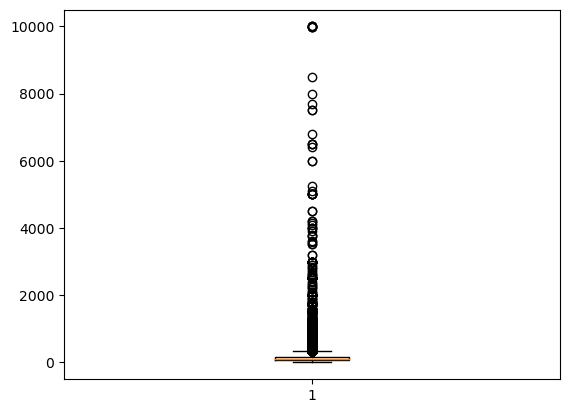

In [61]:
plt.boxplot(df2)

In [73]:
#checking the outliers using IQR
q1=df2.quantile(0.25)

In [65]:
q3=df2.quantile(0.75)

In [66]:
IQR=q3-q1

In [67]:
outliers = df2[((df2<(q1-1.5*IQR)) | (df2>(q3+1.5*IQR)))]

In [74]:
print("number of outliers: " + str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 2972
max outlier value: 10000
min outlier value: 335


In [115]:
#checking the highest and the lowest allowed outliers : 
print("Highest allowed",df["price"].mean() + 1.5*df["price"].std())
print("Lowest allowed",df["price"].mean() - 1.5*df["price"].std())

Highest allowed 512.9519418076097
Lowest allowed -207.51056743395196


In [116]:
df[(df["price"] > 512.951) | (df["price"] < -207.511)]

name    host_id  \
85                   perfect for a family or small group      74303   
299                   Unique spacious loft on the Bowery     281229   
345                                 The Brooklyn Waverly     116599   
365                    2 BR w/ Terrace @ Box House Hotel     417504   
496                Luxury 2Bed/2.5Bath Central Park View     836168   
...                                                  ...        ...   
48535     Stunning & Stylish Brooklyn Luxury, near Train  245712163   
48697         HUGE LUXURY CONDO – INCREDIBLE WATER VIEWS  273619215   
48740         Spacious 2BR in Beautiful Brooklyn Heights    6608220   
48757     Luxury & Spacious 1500 ft² MANHATTAN Townhouse   11454384   
48839  Massage Spa. Stay overnight. Authors Artist dr...  274079964   

                 host_name neighbourhood_group       neighbourhood  latitude  \
85                  Maggie            Brooklyn    Brooklyn Heights  40.69723   
299                 Alicia           Manhattan        Little Italy  40.71943   
345                   Sahr            Brooklyn        Clinton Hill  40.68613   
365    The Box House Hotel            Brooklyn          Greenpoint  40.73861   
496                  Henry           Manhattan     Upper West Side  40.77350   
...                    ...                 ...                 ...       ...   
48535              Urvashi            Brooklyn  Bedford-Stuyvesant  40.68245   
48697                Layla           Manhattan     Upper West Side  40.77665   
48740                 Matt            Brooklyn    Brooklyn Heights  40.69827   
48757                Ellen           Manhattan             Tribeca  40.71815   
48839              Richard            Brooklyn      Sheepshead Bay  40.59866   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
85     -73.99268  Entire home/apt    800               1                 25   
299    -73.99627  Entire home/apt    575               2                191   
345    -73.96536  Entire home/apt    650               5                  0   
365    -73.95485     Private room    599               3                  9   
496    -73.98697  Entire home/apt   2000              30                 30   
...          ...              ...    ...             ...                ...   
48535  -73.93417  Entire home/apt   1749               1                  0   
48697  -73.98867  Entire home/apt    750               4                  0   
48740  -73.99649  Entire home/apt    550               3                  1   
48757  -74.01145  Entire home/apt    700               3                  0   
48839  -73.95661     Private room    800               1                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
85                  0.24                               1                 7  
299                 1.88                               1               298  
345                 1.00                               3               365  
365                 0.09                              28                60  
496                 0.33                              11                 0  
...                  ...                             ...               ...  
48535               1.00                               1               303  
48697               1.00                               1               174  
48740               1.00                               1               230  
48757               1.00                               1                37  
48839               1.00                               1                23  

[1035 rows x 14 columns]

In [117]:
#storing it in a new vaiable : 
df3 = df[(df["price"] < 512.951) & (df["price"] > -207.511)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1d4db0f3390>,
 'caps': [<matplotlib.lines.Line2D at 0x1d4db108690>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d4db0314d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d4db109850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d4db109fd0>],
 'means': []}

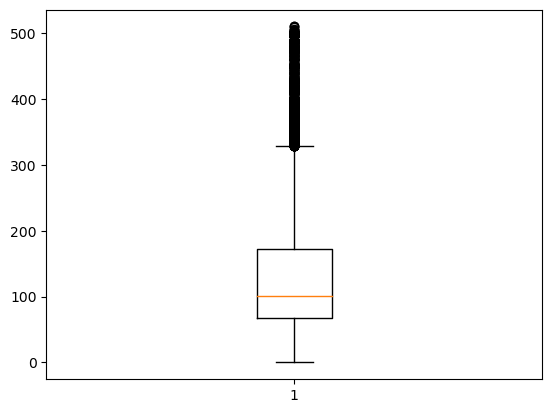

In [118]:
plt.boxplot(df3["price"])

In [119]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47860 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            47844 non-null  object 
 1   host_id                         47860 non-null  int64  
 2   host_name                       47839 non-null  object 
 3   neighbourhood_group             47860 non-null  object 
 4   neighbourhood                   47860 non-null  object 
 5   latitude                        47860 non-null  float64
 6   longitude                       47860 non-null  float64
 7   room_type                       47860 non-null  object 
 8   price                           47860 non-null  int64  
 9   minimum_nights                  47860 non-null  int64  
 10  number_of_reviews               47860 non-null  int64  
 11  reviews_per_month               47860 non-null  float64
 12  calculated_host_listings_count  47860

In [120]:
df3.to_excel("F:\\NYC_3.xlsx")